In [ ]:
!pip install tpot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
#membaca file dataset
df = pd.read_csv('/content/drive/MyDrive/malin/weatherAUS.csv')

In [ ]:
#melihat info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
#melihat contoh data yang terdapat pada dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
#melihat persentase missing values
df.isnull().sum().sort_values(ascending=False)/len(df)*100

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
RainToday         2.241853
Rainfall          2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
WindSpeed9am      1.214767
Temp9am           1.214767
MinTemp           1.020899
MaxTemp           0.866905
Location          0.000000
Date              0.000000
dtype: float64

In [ ]:
#melihat jumlah missing value
df.isnull().sum().sort_values(ascending=False)

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
RainToday         3261
Rainfall          3261
WindSpeed3pm      3062
Humidity9am       2654
WindSpeed9am      1767
Temp9am           1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

In [ ]:
#melihat persebaran data berdasarkan kelas target
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


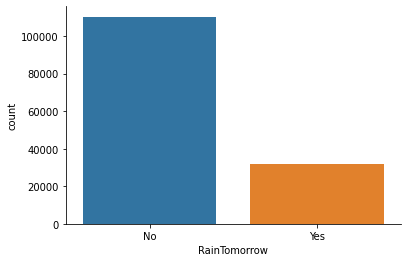

In [ ]:
sns.countplot(df['RainTomorrow'])
sns.despine()

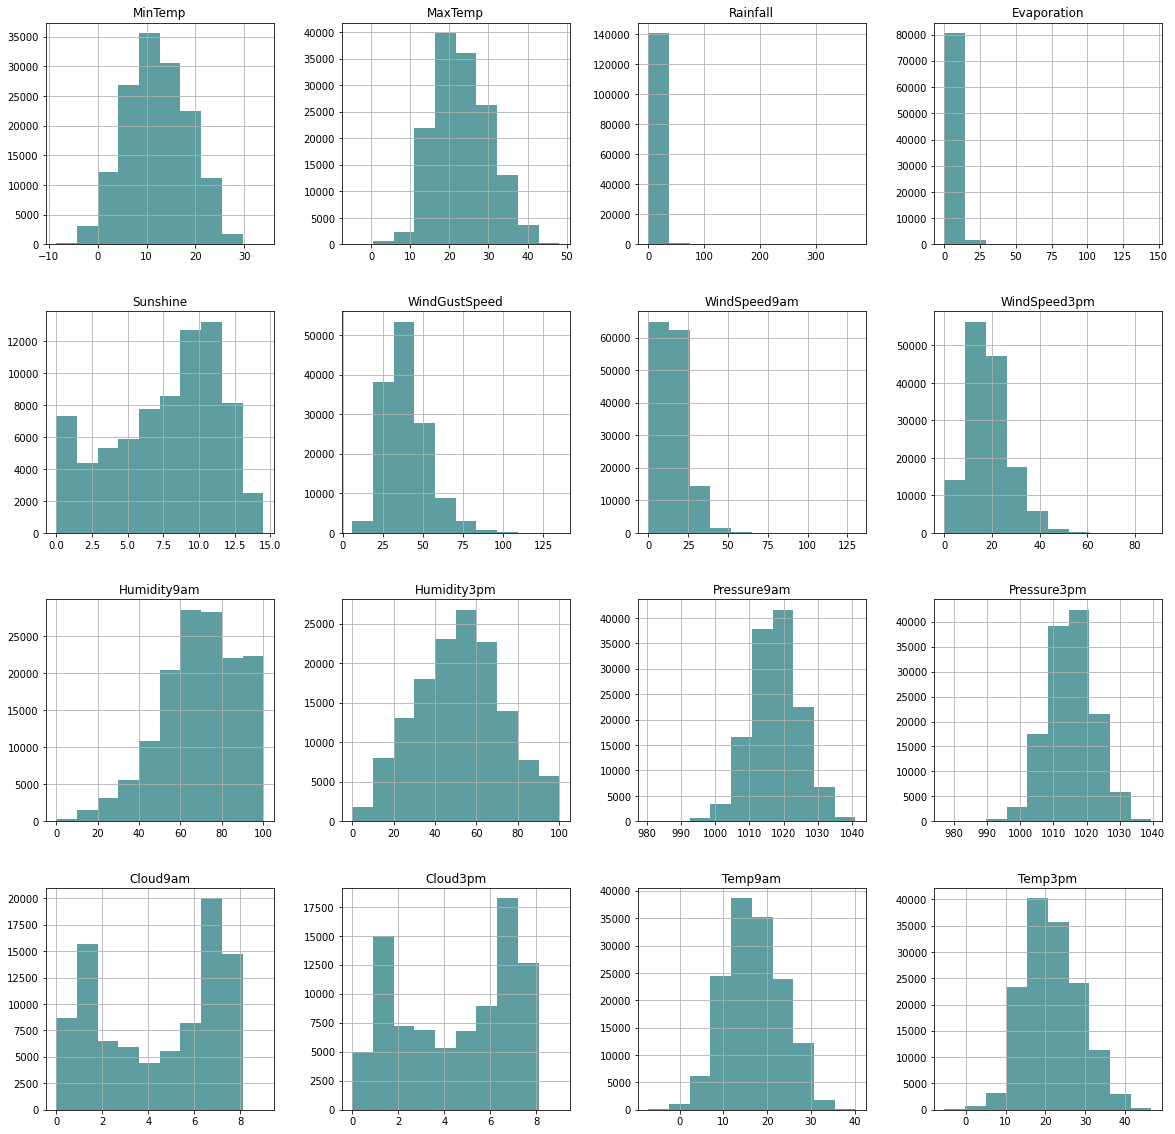

In [ ]:
#plot histogram untuk melihat distribusi persebaran data tiap kolom feature
data_hist_plot = df.hist(figsize = (20,20), color = "#5F9EA0")

# Skenario 1 (Drop data NaN)

In [ ]:
#drop kolom yang memiliki data NaN atau missing value yang banyak
data_train = df.drop(columns=['Sunshine'])
data_train = data_train.drop(columns=['Evaporation'])
data_train = data_train.drop(columns=['Cloud3pm'])
data_train = data_train.drop(columns=['Cloud9am'])
data_train = data_train.drop(columns=['Date'])

#drop data yang memiliki nilai NaN
data_train = data_train.dropna()

In [ ]:
#memberi label pada data kategorikal
le = LabelEncoder()
data_train['RainToday'] = le.fit_transform(data_train['RainToday'])
data_train['RainTomorrow'] = le.fit_transform(data_train['RainTomorrow'])
data_train['Location'] = le.fit_transform(data_train['Location'])
data_train['WindGustDir'] = le.fit_transform(data_train['WindGustDir'])
data_train['WindDir9am'] = le.fit_transform(data_train['WindDir9am'])
data_train['WindDir3pm'] = le.fit_transform(data_train['WindDir3pm'])

In [ ]:
data_train.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [ ]:
#jumlah data berdasarkan target
data_train['RainTomorrow'].value_counts()

0    87906
1    25019
Name: RainTomorrow, dtype: int64

In [ ]:
data_train.isnull().sum().sort_values(ascending=False)/len(df)*100

RainTomorrow     0.0
RainToday        0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Temp9am          0.0
Temp3pm          0.0
Location         0.0
dtype: float64

In [ ]:
data_train.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [ ]:
#memisahkan X menjadi data feature dan y menjadi data target
X = data_train.drop(columns=['RainTomorrow'])
y = data_train.RainTomorrow

In [ ]:
#split data menjadi 3:1 untuk training model dan untuk testing model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

In [ ]:
#pemodelan menggunakan TPOT
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, n_jobs=-1)
tpot.fit(X_train, y_train)


Generation 1 - Current best internal CV score: 0.8574380091577796

Generation 2 - Current best internal CV score: 0.8587604284566173

Generation 3 - Current best internal CV score: 0.8587604284566173

Generation 4 - Current best internal CV score: 0.8587604284566173

Generation 5 - Current best internal CV score: 0.8587604284566173

Best pipeline: LinearSVC(RobustScaler(GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=8, max_features=0.8, min_samples_leaf=13, min_samples_split=5, n_estimators=100, subsample=0.4)), C=0.5, dual=False, loss=squared_hinge, penalty=l1, tol=0.001)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               log_file=None, max_eval_time_mins=5, max_time_mins=None,
               memory=None, mutation_rate=0.9, n_jobs=-1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=50,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [ ]:
#melihat akurasi dari model TPOT yang telah didapat
print('accuration for this pipeline : ', tpot.score(X_test, y_test))

accuration for this pipeline :  0.8571479172570133


In [ ]:
#melihat metric precision, recall dan f1-score
y_pred = tpot.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     21840
           1       0.73      0.59      0.65      6392

    accuracy                           0.86     28232
   macro avg       0.81      0.76      0.78     28232
weighted avg       0.85      0.86      0.85     28232



# Skenario 2 (Terdapat NaN dan hanya feature numerikal)

In [ ]:
#mengambil data dengan feature numerikal saja
col = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 
       'Temp9am', 'Temp3pm', 'RainToday','RainTomorrow']
data_train = df[col]
data_train = data_train[data_train['RainTomorrow'].notna()]
data_train = data_train[data_train['RainToday'].notna()]

In [ ]:
data_train['RainTomorrow'].value_counts()

No     109586
Yes     31201
Name: RainTomorrow, dtype: int64

In [ ]:
#membeli label pada data RainToday dan RainTomorrow, karena masih beruba yes dan no
le = LabelEncoder()
data_train['RainToday'] = le.fit_transform(data_train['RainToday'])
data_train['RainTomorrow'] = le.fit_transform(data_train['RainTomorrow'])
data_train.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [ ]:
#memisahkan X menjadi data feature dan y menjadi data target
X = data_train.drop(columns=['RainTomorrow'])
y = data_train.RainTomorrow

In [ ]:
#split data menjadi 3:1 untuk training model dan untuk testing model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

In [ ]:
#pemodelan menggunakan TPOT
tpot = TPOTClassifier(generations=4, population_size=50, verbosity=2, n_jobs=-1)
tpot.fit(X_train, y_train)

Imputing missing values in feature set



Generation 1 - Current best internal CV score: 0.851633677431575

Generation 2 - Current best internal CV score: 0.851633677431575

Generation 3 - Current best internal CV score: 0.8520314423714368

Generation 4 - Current best internal CV score: 0.8527512075007102

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=6, max_features=0.5, min_samples_leaf=12, min_samples_split=2, n_estimators=100, subsample=0.55)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=4,
               log_file=None, max_eval_time_mins=5, max_time_mins=None,
               memory=None, mutation_rate=0.9, n_jobs=-1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=50,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [ ]:
#melihat akurasi dari model TPOT yang telah didapat
print('accuration for this pipeline : ', tpot.score(X_test, y_test))

Imputing missing values in feature set
accuration for this pipeline :  0.8564082166093702


In [ ]:
#melihat metric precision, recall dan f1-score
y_pred = tpot.predict(X_test)
print(classification_report(y_test, y_pred))

Imputing missing values in feature set
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     27542
           1       0.75      0.52      0.61      7655

    accuracy                           0.86     35197
   macro avg       0.81      0.73      0.76     35197
weighted avg       0.85      0.86      0.85     35197



# Skenario 3 (Mengisi data NaN dan Oversampling)

In [ ]:
# mengisi data missing values pada feature numerikal dengan nilai rata-rata tiap feature 
data_train = df.copy()
data_train["MaxTemp"]= data_train["MaxTemp"].fillna(data_train["MaxTemp"].mean())
data_train["MinTemp"]= data_train["MinTemp"].fillna(data_train["MinTemp"].mean())
data_train["Evaporation"]= data_train["Evaporation"].fillna(data_train["Evaporation"].mean())
data_train["Sunshine"]= data_train["Sunshine"].fillna(data_train["Sunshine"].mean())
data_train["Rainfall"]= data_train["Rainfall"].fillna(data_train["Rainfall"].mean())
data_train["WindSpeed3pm"]= data_train["WindSpeed3pm"].fillna(data_train["WindSpeed3pm"].mean())
data_train["WindGustSpeed"]= data_train["WindGustSpeed"].fillna(data_train["WindGustSpeed"].mean())
data_train["WindSpeed9am"]= data_train["WindSpeed9am"].fillna(data_train["WindSpeed9am"].mean())
data_train["Humidity9am"]= data_train["Humidity9am"].fillna(data_train["Humidity9am"].mean())
data_train["Humidity3pm"]= data_train["Humidity3pm"].fillna(data_train["Humidity3pm"].mean())
data_train["Pressure9am"]= data_train["Pressure9am"].fillna(data_train["Pressure9am"].mean())
data_train["Pressure3pm"]= data_train["Pressure3pm"].fillna(data_train["Pressure3pm"].mean())
data_train["Cloud9am"]= data_train["Cloud9am"].fillna(data_train["Cloud9am"].mean())
data_train["Cloud3pm"]= data_train["Cloud3pm"].fillna(data_train["Cloud3pm"].mean())
data_train["Temp9am"]= data_train["Temp9am"].fillna(data_train["Temp9am"].mean())
data_train["Temp3pm"]= data_train["Temp3pm"].fillna(data_train["Temp3pm"].mean())

In [ ]:
#membeli label pada data RainToday dan RainTomorrow, karena masih beruba yes dan no
data_train['RainToday'] = data_train['RainToday'].map({'Yes': 1, 'No': 0})
data_train['RainTomorrow'] = data_train['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [ ]:
# mengisi data missing values pada feature kategorikal dengan modus tiap feature 
data_train['RainToday']=data_train['RainToday'].fillna(data_train['RainToday'].mode()[0])
data_train['RainTomorrow']=data_train['RainTomorrow'].fillna(data_train['RainTomorrow'].mode()[0])
data_train['WindDir9am'] = data_train['WindDir9am'].fillna(data_train['WindDir9am'].mode()[0])
data_train['WindGustDir'] = data_train['WindGustDir'].fillna(data_train['WindGustDir'].mode()[0])
data_train['WindDir3pm'] = data_train['WindDir3pm'].fillna(data_train['WindDir3pm'].mode()[0])

In [ ]:
data_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0.0,0.0


In [ ]:
#melihat kembali persentase missing values
data_train.isnull().sum().sort_values(ascending=False)/len(df)*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

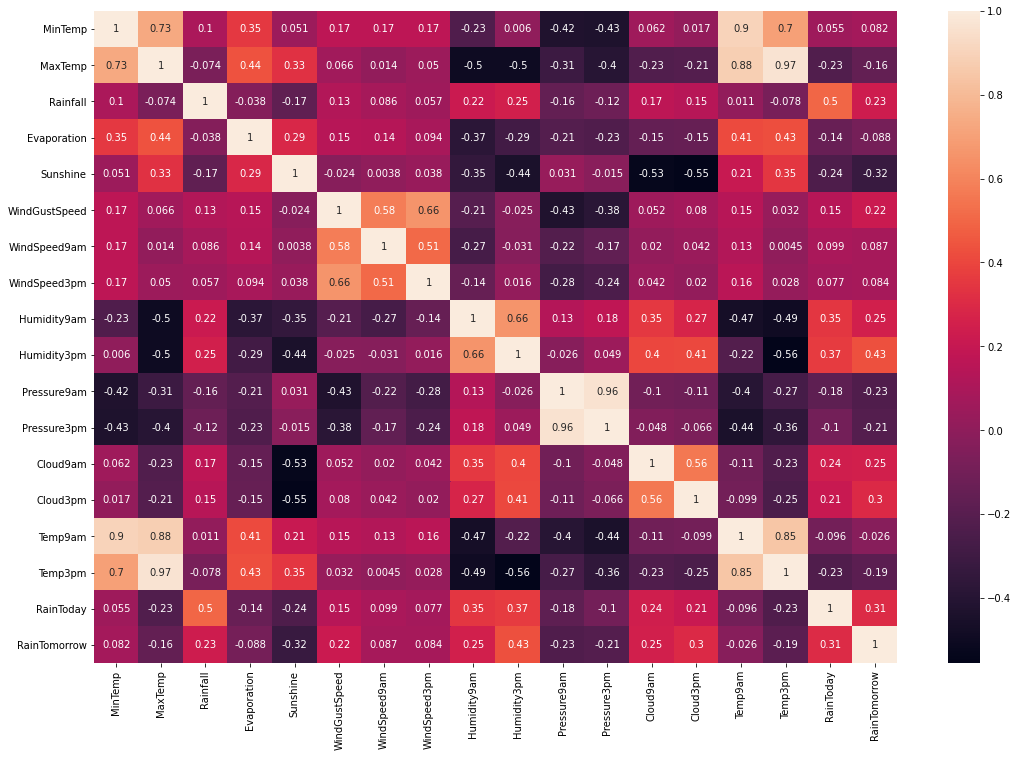

In [ ]:
#plot heatmap untuk melihat korelasi antar feature
plt.figure(figsize=(18,12))
sns.heatmap(data_train.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#memberi label encoding untuk 
le = LabelEncoder()
data_train["Location"] = le.fit_transform(data_train["Location"])
data_train["WindDir9am"]= le.fit_transform(data_train["WindDir9am"])
data_train["WindDir3pm"]= le.fit_transform(data_train["WindDir3pm"])
data_train["WindGustDir"] = le.fit_transform(data_train["WindGustDir"])

In [ ]:
# Dropping highly correlated columns
data_train=data_train.drop(['Temp3pm','Temp9am','Humidity9am',"Date"],axis=1)
data_train.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
#memisahkan X menjadi data feature dan y menjadi data target
X = data_train.drop(columns=['RainTomorrow'])
y = data_train.RainTomorrow

In [ ]:
#split data menjadi 3:1 untuk training model dan untuk testing model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

In [ ]:
#melakukan oversampling dengan Library SMOTE, agar data menjadi balance
from collections import Counter
from imblearn.over_sampling import SMOTE
os = SMOTE()
X_train, y_train = os.fit_resample(X_train, y_train)
count = Counter(y_train)
print(count)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0.0: 85079, 1.0: 85079})


In [ ]:
#pemodelan dengan TPOT
tpot = TPOTClassifier(generations=3, population_size=30, verbosity=2, n_jobs=-1)
tpot.fit(X_train, y_train)


Generation 1 - Current best internal CV score: 0.8932348797565405

Generation 2 - Current best internal CV score: 0.8932348797565405

Generation 3 - Current best internal CV score: 0.8949861954524524

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.6500000000000001, min_samples_leaf=1, min_samples_split=10, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=3,
               log_file=None, max_eval_time_mins=5, max_time_mins=None,
               memory=None, mutation_rate=0.9, n_jobs=-1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=30,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [ ]:
#melihat akurasi dari model TPOT yang telah didapat
print('accuration for this pipeline : ', tpot.score(X_test, y_test))

accuration for this pipeline :  0.8476282139419772


In [ ]:
#melihat metric precision, recall dan f1-score
y_pred = tpot.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90     28504
         1.0       0.65      0.64      0.65      7861

    accuracy                           0.85     36365
   macro avg       0.78      0.77      0.77     36365
weighted avg       0.85      0.85      0.85     36365

